In [1]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

In [2]:
pd.set_option('display.max_rows',None)
df1=pd.read_csv('car_sales.csv')
df1

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


In [3]:
df1.shape

(93, 28)

In [4]:
df1.dtypes

Unnamed: 0              int64
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

In [5]:
df1.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [6]:
df1.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


In [7]:
df1.describe(include='object')

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
count,93,93,93,93,93,93,93,93,93
unique,32,93,6,3,3,6,2,2,93
top,Chevrolet,Integra,Midsize,Driver only,Front,4,Yes,USA,Acura Integra
freq,8,1,22,43,67,49,61,48,1


In [8]:
df1.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [9]:
df1['Luggage.room'].fillna(df1['Luggage.room'].median(), inplace=True)
df1['Rear.seat.room'].fillna(df1['Rear.seat.room'].median(), inplace=True)

In [10]:
df1.isnull().sum()

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [11]:
df1.describe(include='object')

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
count,93,93,93,93,93,93,93,93,93
unique,32,93,6,3,3,6,2,2,93
top,Chevrolet,Integra,Midsize,Driver only,Front,4,Yes,USA,Acura Integra
freq,8,1,22,43,67,49,61,48,1


In [12]:
df1['Cylinders']=df1['Cylinders'].replace({'rotary':6})
df1['Cylinders']=df1['Cylinders'].astype('int64')

In [13]:
df1.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,17.125806,19.509677,21.898925,22.365591,29.086022,4.978495,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.822581,13.903226,3072.903226
std,8.746029,9.659430,11.030457,5.619812,5.331726,1.301993,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.956795,2.813263,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,3.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,4.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,4.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,6.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,8.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


<AxesSubplot:>

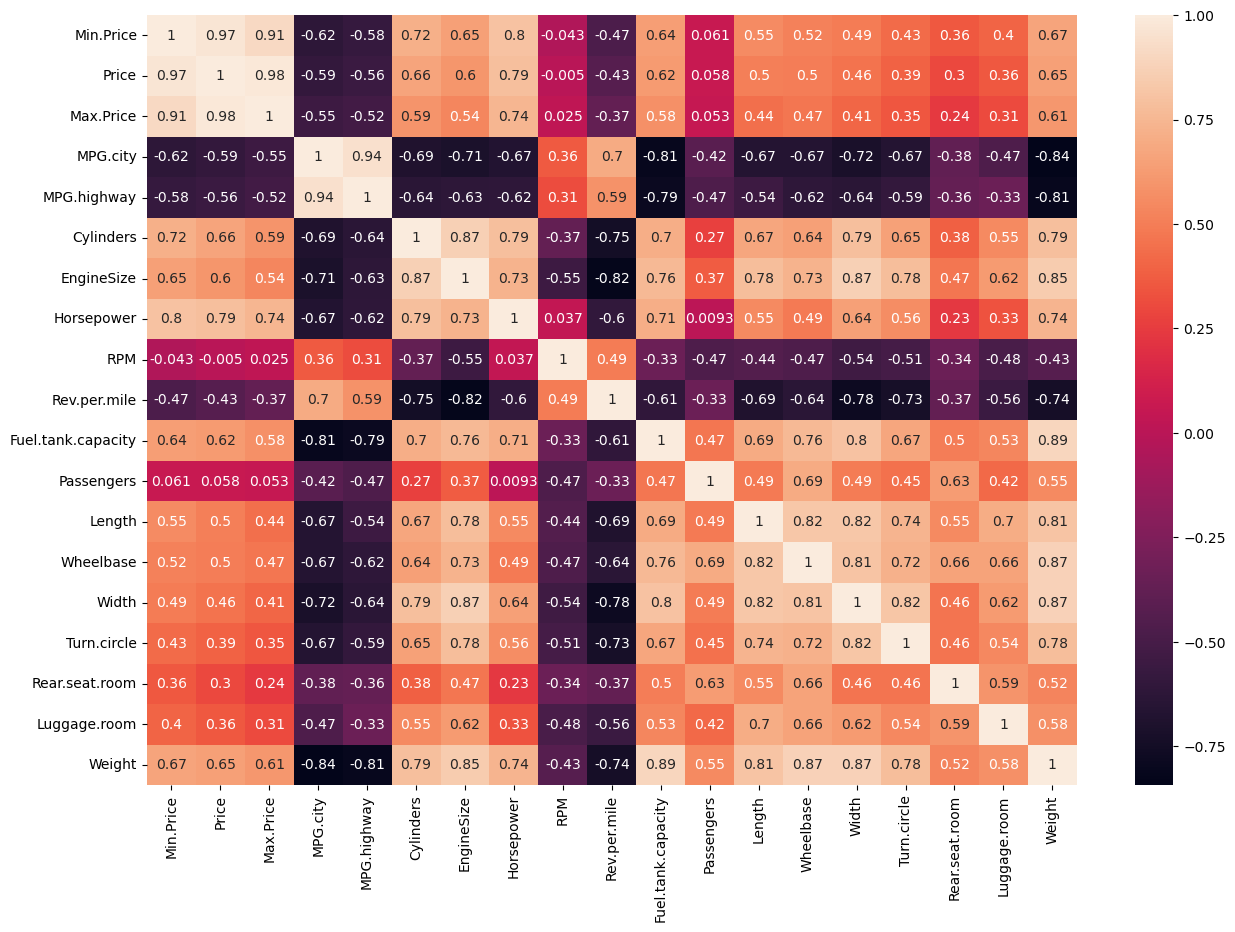

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df1.corr(),annot=True)


In [15]:
df1.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.717861,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.356926,0.396940,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.663953,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.297898,0.355827,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.593899,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.238249,0.308203,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.689686,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.378071,-0.466621,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.638576,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.362379,-0.333507,-0.810658
Cylinders,0.717861,0.663953,0.593899,-0.689686,-0.638576,1.000000,0.867830,0.790403,-0.368484,-0.748330,0.704988,0.266544,0.669712,0.642555,0.790335,0.649879,0.382989,0.551384,0.788650
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,0.867830,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.471733,0.620915,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.790403,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.230654,0.331115,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.368484,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.335709,-0.484468,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.748330,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.368190,-0.559548,-0.735264


In [16]:
df1

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


In [17]:
int_cols = df1.select_dtypes(include=['int','float64']).columns
print(int_cols)

Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight'],
      dtype='object')


In [18]:
df1_cat=df1.select_dtypes(include='object')
df1_cat.columns

Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object')

In [19]:
df1

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


# SLR

In [20]:
df1=df1.drop(columns=df1[['Model','Manufacturer','Make','Origin']],axis=1)
df1.shape

(93, 23)

In [21]:
ca_en=pd.get_dummies(data=df1['Type'],drop_first=True,prefix='Type')
df1=pd.concat([df1,ca_en],axis=1)
df1.drop(columns='Type',axis=1,inplace=True)

In [22]:
ca_en=pd.get_dummies(data=df1['AirBags'],drop_first=True,prefix='AirBags')
df1=pd.concat([df1,ca_en],axis=1)
df1.drop(columns='AirBags',axis=1,inplace=True)

In [23]:
ca_en=pd.get_dummies(data=df1['DriveTrain'],drop_first=True,prefix='DriveTrain')
df1=pd.concat([df1,ca_en],axis=1)
df1.drop(columns='DriveTrain',axis=1,inplace=True)

In [24]:
df1

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,...,Weight,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear
0,12.9,15.9,18.8,25,31,4,1.8,140,6300,2890,...,2705,0,0,1,0,0,0,1,1,0
1,29.2,33.9,38.7,18,25,6,3.2,200,5500,2335,...,3560,0,1,0,0,0,0,0,1,0
2,25.9,29.1,32.3,20,26,6,2.8,172,5500,2280,...,3375,0,0,0,0,0,1,0,1,0
3,30.8,37.7,44.6,19,26,6,2.8,172,5500,2535,...,3405,0,1,0,0,0,0,0,1,0
4,23.7,30.0,36.2,22,30,4,3.5,208,5700,2545,...,3640,0,1,0,0,0,1,0,0,1
5,14.2,15.7,17.3,22,31,4,2.2,110,5200,2565,...,2880,0,1,0,0,0,1,0,1,0
6,19.9,20.8,21.7,19,28,6,3.8,170,4800,1570,...,3470,1,0,0,0,0,1,0,1,0
7,22.6,23.7,24.9,16,25,6,5.7,180,4000,1320,...,4105,1,0,0,0,0,1,0,0,1
8,26.3,26.3,26.3,19,27,6,3.8,170,4800,1690,...,3495,0,1,0,0,0,1,0,1,0
9,33.0,34.7,36.3,16,25,8,4.9,200,4100,1510,...,3620,1,0,0,0,0,1,0,1,0


In [25]:
df1.shape

(93, 29)